In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import random
import warnings
warnings.simplefilter(action = 'ignore', category=FutureWarning)
warnings.filterwarnings('ignore')
def ignore_warn(*args, **kwargs):
    pass

warnings.warn = ignore_warn #ignore annoying warning (from sklearn and seaborn)
pd.set_option('display.max_rows',1000)
pd.set_option('display.max_columns',1000)
%matplotlib inline

In [115]:
df=pd.read_csv('winequality-red.csv')
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [116]:
display(df.describe().transpose())

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1599.0,8.319637,1.741096,4.60000,7.1000,7.90000,9.200000,15.90000
volatile acidity,1599.0,0.527821,0.179060,0.12000,0.3900,0.52000,0.640000,1.58000
citric acid,1599.0,0.270976,0.194801,0.00000,0.0900,0.26000,0.420000,1.00000
residual sugar,1599.0,2.538806,1.409928,0.90000,1.9000,2.20000,2.600000,15.50000
chlorides,1599.0,0.087467,0.047065,0.01200,0.0700,0.07900,0.090000,0.61100
free sulfur dioxide,1599.0,15.874922,10.460157,1.00000,7.0000,14.00000,21.000000,72.00000
total sulfur dioxide,1599.0,46.467792,32.895324,6.00000,22.0000,38.00000,62.000000,289.00000
density,1599.0,0.996747,0.001887,0.99007,0.9956,0.99675,0.997835,1.00369
pH,1599.0,3.311113,0.154386,2.74000,3.2100,3.31000,3.400000,4.01000
sulphates,1599.0,0.658149,0.169507,0.33000,0.5500,0.62000,0.730000,2.00000


In [117]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
fixed acidity           1599 non-null float64
volatile acidity        1599 non-null float64
citric acid             1599 non-null float64
residual sugar          1599 non-null float64
chlorides               1599 non-null float64
free sulfur dioxide     1599 non-null float64
total sulfur dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
quality                 1599 non-null int64
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [118]:
corr_wrt_quality=df[df.columns[1:]].corr()['quality'][:]
corr_wrt_quality_df = pd.DataFrame(corr_wrt_quality)
corr_wrt_quality_df.sort_values(by=['quality'], inplace=True, ascending=False)
corr_wrt_quality_df.head(15)

,quality
quality,1.000000
alcohol,0.476166
sulphates,0.251397
citric acid,0.226373
residual sugar,0.013732
free sulfur dioxide,-0.050656
pH,-0.057731
chlorides,-0.128907
density,-0.174919
total sulfur dioxide,-0.185100


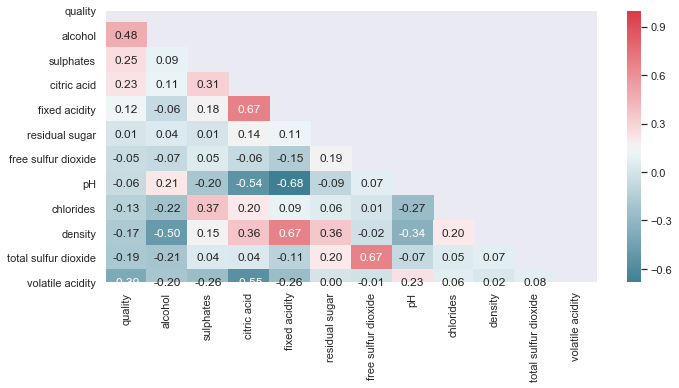

In [119]:
corr = df[df.quality>1].corr()
top_corr_cols = corr[abs((corr.quality)>=-0.5)].quality.sort_values(ascending=False).keys()
top_corr = corr.loc[top_corr_cols, top_corr_cols]
dropSelf = np.zeros_like(top_corr)
dropSelf[np.triu_indices_from(dropSelf)] = True
plt.figure(figsize=(11, 5))
sns.heatmap(top_corr, cmap=sns.diverging_palette(220, 10, as_cmap=True), annot=True, fmt=".2f", mask=dropSelf)
sns.set(font_scale=1)
plt.show()
del corr, dropSelf, top_corr
%matplotlib inline

In [120]:
df['quality'].unique()

array([5, 6, 7, 4, 8, 3], dtype=int64)

In [121]:
#count of each target variable
from collections import Counter
Counter(df['quality'])

Counter({5: 681, 6: 638, 7: 199, 4: 53, 8: 18, 3: 10})

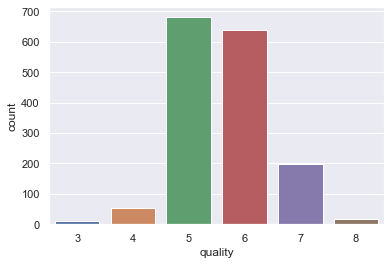

In [122]:
#count of the target variable
sns.countplot(x='quality',data=df)
plt.show()

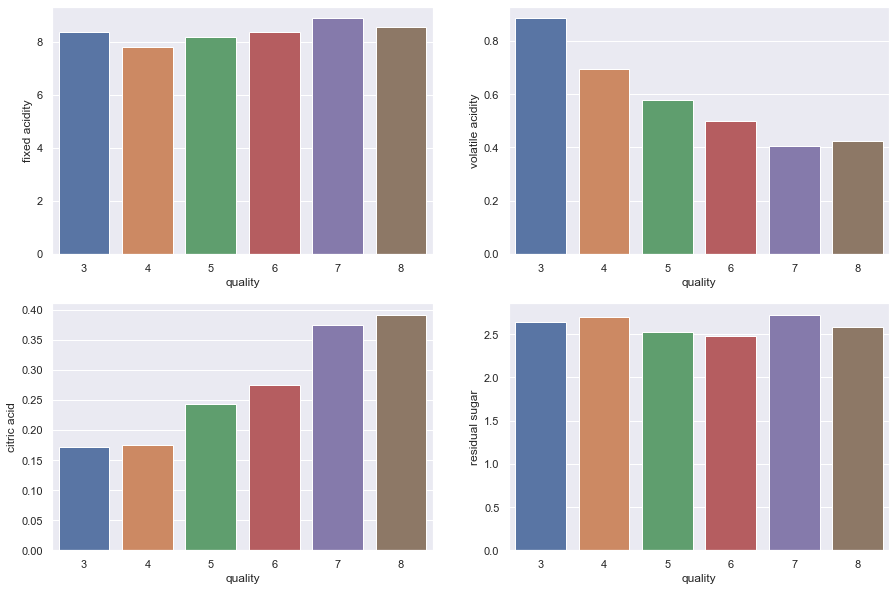

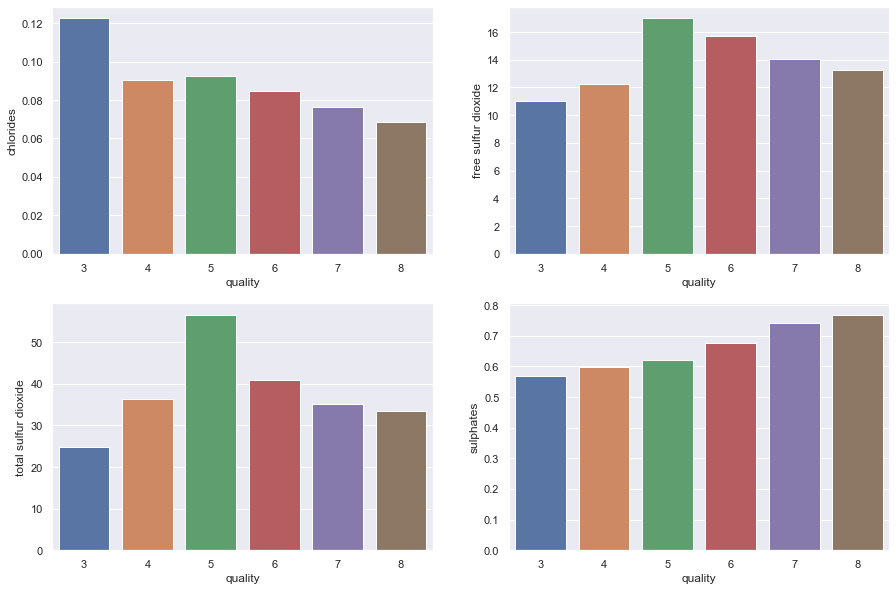

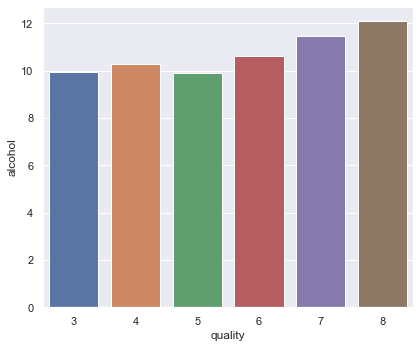

In [123]:
%matplotlib inline
fig = plt.figure(figsize=(15, 10))
sns.set(font_scale=1)

fig1 =  fig.add_subplot(221);
sns.barplot(x = 'quality', y = 'fixed acidity', data = df,ci=None)

fig2 = fig.add_subplot(222);
sns.barplot(x = 'quality', y = 'volatile acidity', data = df,ci=None)

fig3 = fig.add_subplot(223);
sns.barplot(x = 'quality', y = 'citric acid', data = df,ci=None)

fig4 = fig.add_subplot(224);
sns.barplot(x = 'quality', y = 'residual sugar', data = df,ci=None)

fig5 = plt.figure(figsize=(15, 10))

fig6 = fig5.add_subplot(221);
sns.barplot(x = 'quality', y = 'chlorides', data = df,ci=None)

fig7 = fig5.add_subplot(222);
sns.barplot(x = 'quality', y = 'free sulfur dioxide', data = df,ci=None)

fig8 = fig5.add_subplot(223);
sns.barplot(x = 'quality', y = 'total sulfur dioxide', data = df,ci=None)

fig9 = fig5.add_subplot(224);
sns.barplot(x = 'quality', y = 'sulphates', data = df,ci=None)

fig10 = plt.figure(figsize = (6,5))
sns.barplot(x = 'quality', y = 'alcohol', data = df,ci=None)

plt.tight_layout(); plt.show()
#ci=None is to remove error bars

# Observations
- volatile acidity decreases as we go higher the quality
- citric acid composition go higher as we go higher in the quality of the wine
- Composition of chloride also go down as we go higher in the quality of the wine
- Sulphates level goes higher with the quality of wine
- Alcohol level also goes higher as te quality of wine increases

# Creating a new column to classify quality in 3 main reviews

In [124]:
#1,2,3 --> Bad
#4,5,6,7 --> Average
#8,9,10 --> Excellent
#Create an empty list called over_all_quality
over_all_quality = []
for i in df['quality']:
    if i >= 1 and i <= 3:
        over_all_quality.append('1')
    elif i >= 4 and i <= 7:
        over_all_quality.append('2')
    elif i >= 8 and i <= 10:
        over_all_quality.append('3')
df['over_all_quality'] = over_all_quality

In [125]:
df['over_all_quality'].unique()

array(['2', '3', '1'], dtype=object)

In [126]:
Counter(df['over_all_quality'])

Counter({'2': 1571, '3': 18, '1': 10})

In [127]:
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,over_all_quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,2
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,2
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,2
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,2
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,2
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,2
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,2
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,2


In [128]:
X = df.iloc[:,:11]
y = df['over_all_quality']

In [129]:
X

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2


In [130]:
y

0       2
1       2
2       2
3       2
4       2
       ..
1594    2
1595    2
1596    2
1597    2
1598    2
Name: over_all_quality, Length: 1599, dtype: object

# Modeling

In [165]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve


In [150]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [151]:
# using standard scalar
sc = StandardScaler()

In [195]:
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

# Now we will use different bodeling technique

# RandomForest

In [153]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
rf_predict=rf.predict(X_test)

In [154]:
rf_conf_matrix = confusion_matrix(y_test, rf_predict)
rf_acc_score = accuracy_score(y_test, rf_predict)
print(rf_conf_matrix)
print(rf_acc_score*100)

[[  0   1   0]
 [  0 314   0]
 [  0   5   0]]
98.125


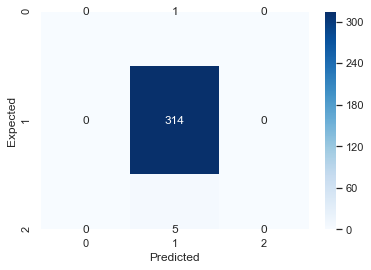

In [155]:
sns.heatmap(pd.DataFrame(rf_conf_matrix), annot = True, cmap = 'Blues', fmt = 'd')
plt.xlabel('Predicted')
plt.ylabel('Expected')
plt.show()

In [193]:
rf_eval = cross_val_score(estimator = rf, X = X_train, y = y_train, cv = 10)
rf_eval.mean()

0.9843688484251969

# Logistic Regression

In [159]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
lr_predict = lr.predict(X_test)

In [161]:
lr_conf_matrix = confusion_matrix(y_test, lr_predict)
lr_acc_score = accuracy_score(y_test, lr_predict)
print(lr_conf_matrix)
print(lr_acc_score*100)

[[  0   1   0]
 [  0 314   0]
 [  0   5   0]]
98.125


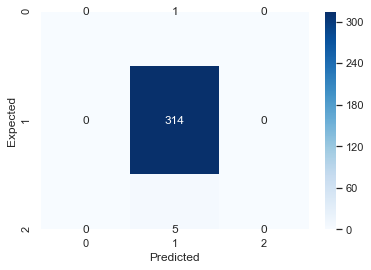

In [162]:
sns.heatmap(pd.DataFrame(lr_conf_matrix), annot = True, cmap = 'Blues', fmt = 'd')
plt.xlabel('Predicted')
plt.ylabel('Expected')
plt.show()

In [188]:
lr_eval = cross_val_score(estimator = lr, X = X_train, y = y_train, cv = 10)
lr_eval.mean()

0.9820189468503937

# DecisionTreeClassifier

In [166]:
dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)
dt_predict = dt.predict(X_test)

In [167]:
dt_conf_matrix = confusion_matrix(y_test, dt_predict)
dt_acc_score = accuracy_score(y_test, dt_predict)
print(dt_conf_matrix)
print(dt_acc_score*100)

[[  0   1   0]
 [  4 303   7]
 [  0   5   0]]
94.6875


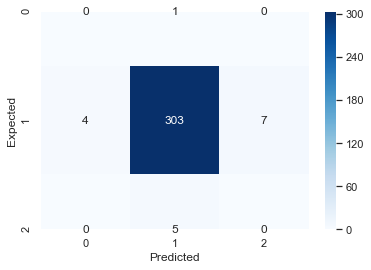

In [168]:
sns.heatmap(pd.DataFrame(dt_conf_matrix), annot = True, cmap = 'Blues', fmt = 'd')
plt.xlabel('Predicted')
plt.ylabel('Expected')
plt.show()

In [189]:
dt_eval = cross_val_score(estimator = dt, X = X_train, y = y_train, cv = 10)
dt_eval.mean()

0.9702817421259843

# Stochastic Gradient Decent Classifier

In [170]:
sgd = SGDClassifier(penalty=None)
sgd.fit(X_train, y_train)
sgd_predict= sgd.predict(X_test)

In [172]:
sgd_conf_matrix = confusion_matrix(y_test, sgd_predict)
sgd_acc_score = accuracy_score(y_test, sgd_predict)
print(sgd_conf_matrix)
print(sgd_acc_score*100)

[[  0   1   0]
 [  2 311   1]
 [  0   5   0]]
97.1875


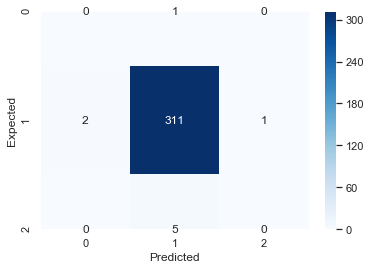

In [173]:
sns.heatmap(pd.DataFrame(sgd_conf_matrix), annot = True, cmap = 'Blues', fmt = 'd')
plt.xlabel('Predicted')
plt.ylabel('Expected')
plt.show()

In [190]:
sgd_eval = cross_val_score(estimator = sgd, X = X_train, y = y_train, cv = 10)
sgd_eval.mean()

0.9765378937007874

# Support Vector Classifier

In [182]:
svc = SVC()
svc.fit(X_train, y_train)
svc_predict = svc.predict(X_test)

In [183]:
svc_conf_matrix = confusion_matrix(y_test, svc_predict)
svc_acc_score = accuracy_score(y_test, svc_predict)
print(svc_conf_matrix)
print(svc_acc_score*100)

[[  0   1   0]
 [  0 314   0]
 [  0   5   0]]
98.125


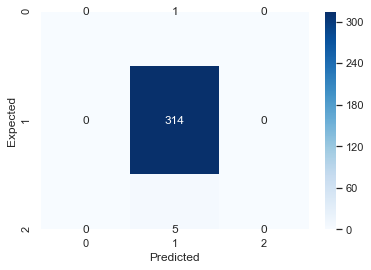

In [184]:
sns.heatmap(pd.DataFrame(lin_svc_conf_matrix), annot = True, cmap = 'Blues', fmt = 'd')
plt.xlabel('Predicted')
plt.ylabel('Expected')
plt.show()

In [191]:
svc_eval = cross_val_score(estimator = svc, X = X_train, y = y_train, cv = 10)
svc_eval.mean()

0.9828001968503937

### As we can see above by using different modeling techniques we achived almost same accuracy in random forest,logistic regression and SVC but in terms of cross validation score random forest score is slightly better so we can say that random forest modeling echinque is best among the models used in this case